In [64]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

%precision 3

'%.3f'

## 1차원 데이터
- 평균값(기댓값), 표본분산, 불편분산(ddof=1), 표준편차
- 표본분산은 표본의 평균을 사용해서 분산을 계산한 값으로 분산을 과소 추정하는 경향이 있으며 그 경향을 없애기 위한 것이 불편분산임. 표본분산 보다 조금 큰 값이 된다.
- 표준화 : 평균값이 큰 변수와 작은 변수가 섞여 있으면 다루기 어려우므로 표준화로 데이터를 비교하기 쉽게 한다.
- 최댓값, 최솟값, 중앙값, 사분위수
- 표본분산과 비편향 분산
    - 분산은 표본 분산과 불편분산(unbiased variance)의 두 종류가 존재
    - 표본 분산은 표본에서 계산된 분산이며 모집단에 비해 표본수가 적을 때는 표본 분산이 모분산보다 작아진다.
    - 즉 표본 분산이 모집단 분산에 맞춰서 동일하게 보정한 것을 비편향 분산이라 한다.
    - 통계학에서는 이 비편향분산ㅇ르 사용하는 경우가 많다.
    - 불편분산은 n대신 n-1로 나누어 구할 수 있다.
    
[표분분산이 분산을 과소 평가하는 이유]

- 호수안에 물고기가 7마리가 있다. 몸길이 {1,2,3,4,5,6,7}, 모평균 4, 샘플링1 3마리{1,2,3} 표본평균 2, 샘플링2 {5,6,7} 표본평균 6
- 이때 분산은 모평균을 모르기 때문에 표본평균과의 거리를 계산하며 분산을 과소평가 하게된다.
- 표본 분산 보다 조금 더 큰 값이 되도록 보정하기 위하여 N대신 N-1로 나누어 불편분산을 구할 수 있다.

In [2]:
df = pd.read_csv('./ch2_scores_em.csv',index_col='student number')
df.head()

,english,mathematics
student number,,
1,42,65
2,69,80
3,56,63
4,41,63
5,57,76


In [3]:
df.shape

(50, 2)

In [4]:
scores = np.array(df['english'])[:10]
scores

array([42, 69, 56, 41, 57, 48, 65, 49, 65, 58], dtype=int64)

In [5]:
scores_df = pd.DataFrame({'score':scores},index=pd.Index(['A','B','C','D','E','F','G','H','I','J'],name='student'))
scores_df

,score
student,
A,42
B,69
C,56
D,41
E,57
F,48
G,65
H,49
I,65


## 1차원 데이터 정리

### 데이터 중심의 지표

#### 평균값

In [6]:
sum(scores)/len(scores)

55.000

In [7]:
np.mean(scores)

55.000

In [8]:
scores_df.mean()

score    55.0
dtype: float64

#### 중앙값

In [9]:
sorted_scores = np.sort(scores)
sorted_scores

array([41, 42, 48, 49, 56, 57, 58, 65, 65, 69], dtype=int64)

In [10]:
n = len(sorted_scores)
if n % 2 ==0:
    m0 = sorted_scores[n//2-1]
    m1 = sorted_scores[n//2]
    median = (m0+m1)/2
else:
    median = sorted_scores[(n+1)//2-1]
median

56.500

In [11]:
np.median(scores)

56.500

In [12]:
scores_df.median()

score    56.5
dtype: float64

#### 최빈값

In [13]:
pd.Series([1,1,1,2,2,3]).mode()

0    1
dtype: int64

In [14]:
pd.Series([1,2,3,4,5]).mode()

0    1
1    2
2    3
3    4
4    5
dtype: int64

### 데이터의 산포도 지표

#### 분산과 표준편차

In [15]:
mean = np.mean(scores)
deviation = scores-mean
deviation

array([-13.,  14.,   1., -14.,   2.,  -7.,  10.,  -6.,  10.,   3.])

In [16]:
another_scores = [50,60,58,54,51,56,57,53,52,59]
another_mean = np.mean(another_scores)
another_deviation = another_scores - another_mean
another_deviation

array([-5.,  5.,  3., -1., -4.,  1.,  2., -2., -3.,  4.])

In [17]:
np.mean(deviation)

0.000

In [18]:
np.mean(another_deviation)

0.000

In [19]:
summary_df = scores_df.copy()
summary_df['deviation'] = deviation
summary_df

,score,deviation
student,,
A,42,-13.0
B,69,14.0
C,56,1.0
D,41,-14.0
E,57,2.0
F,48,-7.0
G,65,10.0
H,49,-6.0
I,65,10.0


In [20]:
summary_df.mean()

score        55.0
deviation     0.0
dtype: float64

In [21]:
np.mean(deviation ** 2)

86.000

In [22]:
np.var(scores)

86.000

In [23]:
scores_df.var()

score    95.555556
dtype: float64

In [24]:
summary_df['square of deviation'] = np.square(deviation)
summary_df

,score,deviation,square of deviation
student,,,
A,42,-13.0,169.0
B,69,14.0,196.0
C,56,1.0,1.0
D,41,-14.0,196.0
E,57,2.0,4.0
F,48,-7.0,49.0
G,65,10.0,100.0
H,49,-6.0,36.0
I,65,10.0,100.0


In [25]:
summary_df.mean()

score                  55.0
deviation               0.0
square of deviation    86.0
dtype: float64

In [26]:
np.sqrt(np.var(scores,ddof=0))

9.274

In [27]:
np.std(scores,ddof=0)

9.274

#### 범위와 사분위 범위

In [28]:
np.max(scores) - np.min(scores)

28

In [29]:
scores_Q1 = np.percentile(scores,25)
scores_Q3 = np.percentile(scores,75)
scores_IQR = scores_Q3 - scores_Q1
scores_IQR

15.000

#### 데이터의 지표 정리

In [32]:
pd.Series(scores).describe()

count    10.000000
mean     55.000000
std       9.775252
min      41.000000
25%      48.250000
50%      56.500000
75%      63.250000
max      69.000000
dtype: float64

#### 0822 [과제] 교재 ~p.51 코드 문제 풀기

#### 0822 [과제] 20개 원소로 구성되는 배열을 만든 후, 평균, 편차 및 편차의 합을 구하세요.

In [40]:
import random
arr1 = np.random.randint(100,size=20)
arr1

array([ 4, 42, 32, 53, 80, 26, 25, 37, 85, 69, 25, 19, 52, 79, 65, 79, 41,
        5,  7, 97])

In [41]:
arr1.mean()

46.100

In [77]:
deviation = arr1 - arr1.mean()
deviation

array([-42.1,  -4.1, -14.1,   6.9,  33.9, -20.1, -21.1,  -9.1,  38.9,
        22.9, -21.1, -27.1,   5.9,  32.9,  18.9,  32.9,  -5.1, -41.1,
       -39.1,  50.9])

In [48]:
deviation.sum()

0.000

#### 0822 [과제] 중앙값 > 평균값 인 경우와 중앙값 < 평균값인 두가지 집합에서 나타나는 가능성 있는 특징을 사례로 설명하세요.

In [58]:
# 중앙값(median) > 평균값(mean)
# 160~170 사이 비슷한 키를 가진 사람들
arr2 = [168,165,166,162,160,167]
arr2_mean = np.mean(arr2)
arr2_median = np.median(arr2)
print(f'평균값 : {arr2_mean}')
print(f'중앙값 : {arr2_median}')

평균값 : 164.66666666666666
중앙값 : 165.5


In [57]:
# 중앙값(median) < 평균값(mean)
# 월급받는 개발자 5명과, 프리랜서(비교적 고연봉) 1명
arr3 = [250,300,255,210,320,700]
arr3_mean = np.mean(arr3)
arr3_median = np.median(arr3)
print(f'평균값 : {arr3_mean}')
print(f'중앙값 : {arr3_median}')

평균값 : 339.1666666666667
중앙값 : 277.5


#### 0822 [과제]  4분위를 이용하여 이상치를 구하는 사례를 생성하고 시각화 및 이상치 산출하는 과정을 설명하세요.

In [65]:
df_hw = pd.read_csv('./stock_market.csv')
df_hw

,ID,Name,Market,Category,Capital,PER,EPS,ROE,PBR,BPS,...,Retention_Continuous,Open,High,Low,Close,DaytoDay,Volume,Highest_Price,Highest_Date,update_date
0,20,동화약품,KOSPI,제약,3282,22.82,204,5.27,1.16,12534,...,5,11400,11750,11400,11750,300,67692,21550,2020-08-11,2022-05-13 7:04
1,40,KR모터스,KOSPI,자동차,761,-8.77,-48,-25.82,2.25,385,...,1,786,804,786,792,8,80163,1450,2019-07-05,2022-05-13 6:31
2,50,경방,KOSPI,"섬유,의류,신발,호화품",4208,16.92,155,2.98,0.46,30043,...,5,15100,15350,14900,15350,200,8396,17750,2022-04-26,2022-05-13 6:48
3,60,메리츠화재,KOSPI,손해보험,44269,6.13,1605,26.08,1.52,22115,...,4,37250,37350,34650,36700,350,545472,53500,2022-01-21,2022-05-13 7:05
4,70,삼양홀딩스,KOSPI,식품,6988,3.66,1645,14.53,0.43,226314,...,1,81800,82300,81000,81600,500,9234,134000,2021-04-22,2022-05-13 6:48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,4920,씨아이테크,KOSPI,컴퓨터와주변기기,429,-8.51,119,-15.91,1.27,1202,...,2,1070,1115,1065,1075,5,272694,2035,2021-04-27,2022-05-13 6:59
246,4960,한신공영,KOSPI,건설,1799,3.75,2254,7.55,0.27,58000,...,5,15800,16050,15550,15550,200,67490,27500,2021-05-10,2022-05-13 6:39
247,4970,신라교역,KOSPI,식품,2016,4.82,556,8.32,0.38,35004,...,5,12500,12600,12400,12600,50,8071,15450,2021-06-11,2022-05-13 6:39
248,4980,성신양회,KOSPI,건축자재,2917,64.89,619,1.57,0.99,16637,...,4,12050,12300,11800,11900,250,256562,20200,2021-12-20,2022-05-13 7:16


<AxesSubplot:>

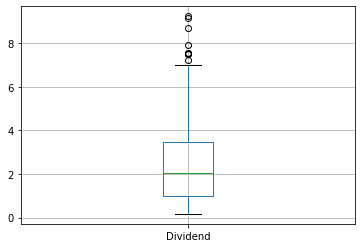

In [67]:
df_hw.boxplot(column=['Dividend'])

In [71]:
Q1 = df_hw[['Dividend']].quantile(q=0.25)
Q3 = df_hw[['Dividend']].quantile(q=0.75)
print(Q1)
print(Q3)

Dividend    1.01
Name: 0.25, dtype: float64
Dividend    3.46
Name: 0.75, dtype: float64


In [72]:
IQR = Q3-Q1
IQR

Dividend    2.45
dtype: float64

In [73]:
IQR_df = df_hw[(df_hw['Dividend'] <= Q3['Dividend']+1.5*IQR['Dividend']) & (df_hw['Dividend'] >= Q1['Dividend']-1.5*IQR['Dividend'])]
IQR_df = IQR_df[['Dividend']]

print('IQR_df :', len(IQR_df))

IQR_df : 180


<AxesSubplot:>

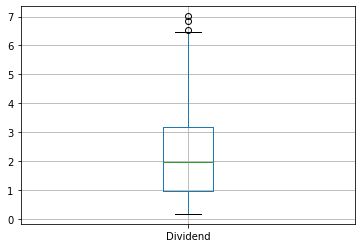

In [74]:
IQR_df.boxplot()

#### 0822 [과제] 표본 분산과 불편 분산의 차이를 사례를 들어 설명하세요.

실제 모분산은 알 수가 없는 경우가 많기 때문에 통계학에서는 표본분산을 많이 사용합니다.

- '불편성'이란 '편하지 않다(不便, incovenience)'라는 뜻이 아니고 '한쪽으로 편중되어 있지 않다(不偏, unbiasedness)'의 뜻으로 
추정량(여기서는 표본분산)의 기대값이 모수(여기서는 모분산)이어야 한다는 성질인데,


- 만약 n-1대신 n으로 나누게 되면 이런 불편추정량으로서의 성질이 없게됨

즉, 표본분산은 모분산의 추정량(estimator)인데, 좋은 추정량으로서 가져야 할 성질 중의 하나가, 불편성(unbiasedness)이고 
표본분산이 불편추정량되기 위해서는  n-1로 나눠 줘야 하는 겁니다.
요약하면, 표본분산에서 n-1로 나누어주는 이유는 n 보다 추정량의 성질이 좋기 때문입니다.

In [103]:
vals = np.random.randint(100,size=50)
mean = sum(vals) / len(vals)

# 표본분산
vsum = 0
for val in vals:
    vsum = vsum + (val - mean)**2
variance = vsum / len(vals)-1
print(f'표본분산 : {variance}')

# 불편분산
vsum1 = 0
for val in vals:
    vsum1 = vsum1 + (val - mean)**2
variance1 = vsum1 / len(vals)
print(f'불편분산 : {variance1}')

print(f'np 분산 : {np.var(vals)}')

표본분산 : 1090.7604000000001
불편분산 : 1091.7604000000001
np 분산 : 1091.7604000000001
